In [2]:
# import libraries

import pandas as pd
import seaborn as sns

In [ ]:
# Set data folder path
datafolder = 'C:/Users/cryst/OneDrive/Documents/PERSONAL/DEVELOPMENT/KAGGLE/2212 Store Sales Time Series Forecasting/Data/'

# Read in data
stores_rawdf = pd.read_csv(datafolder + 'stores.csv')
transactions_rawdf = pd.read_csv(datafolder + 'transactions.csv')
train_rawdf = pd.read_csv(datafolder + 'train.csv')
test_rawdf = pd.read_csv(datafolder + 'test.csv')
oil_rawdf = pd.read_csv(datafolder + 'oil.csv')
holidays_events_rawdf = pd.read_csv(datafolder + 'holidays_events.csv')

In [13]:
# View first 5 rows of dataset
stores_rawdf.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [15]:
transactions_rawdf.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [16]:
train_rawdf.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [21]:
test_rawdf.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [18]:
oil_rawdf.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [20]:
holidays_events_rawdf.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [22]:
# Check info
stores_rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [23]:
transactions_rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [57]:
train_rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [26]:
test_rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [29]:
# Check for missing values
def CheckMissing(DF):
    data_count_missing = DF.isnull().sum()
    data_pct_missing = DF.isnull().sum() * 100 / len(DF)

    print(pd.DataFrame({'count_missing': data_count_missing,
              'percent_missing': data_pct_missing}))

In [33]:
CheckMissing(stores_rawdf)

CheckMissing(transactions_rawdf)

CheckMissing(train_rawdf)

CheckMissing(test_rawdf)

           count_missing  percent_missing
store_nbr              0              0.0
city                   0              0.0
state                  0              0.0
type                   0              0.0
cluster                0              0.0
              count_missing  percent_missing
date                      0              0.0
store_nbr                 0              0.0
transactions              0              0.0
             count_missing  percent_missing
id                       0              0.0
date                     0              0.0
store_nbr                0              0.0
family                   0              0.0
sales                    0              0.0
onpromotion              0              0.0
             count_missing  percent_missing
id                       0              0.0
date                     0              0.0
store_nbr                0              0.0
family                   0              0.0
onpromotion              0              

In [39]:
# Check for duplicates
stores_rawdf[stores_rawdf[['store_nbr', 'city', 'state']].duplicated()]

,store_nbr,city,state,type,cluster


In [38]:
transactions_rawdf[transactions_rawdf[['date', 'store_nbr']].duplicated()]

,date,store_nbr,transactions


In [40]:
train_rawdf[train_rawdf.duplicated()]

,id,date,store_nbr,family,sales,onpromotion


In [19]:
stores_rawdf[['state']].value_counts()

state                         
Pichincha                         19
Guayas                            11
Azuay                              3
Manabi                             3
Santo Domingo de los Tsachilas     3
Cotopaxi                           2
El Oro                             2
Los Rios                           2
Tungurahua                         2
Bolivar                            1
Chimborazo                         1
Esmeraldas                         1
Imbabura                           1
Loja                               1
Pastaza                            1
Santa Elena                        1
dtype: int64

In [59]:
train_rawdf[['onpromotion']].value_counts()

onpromotion
0              2389559
1               174551
2                79386
3                45862
4                31659
                ...   
330                  1
326                  1
322                  1
320                  1
741                  1
Length: 362, dtype: int64

In [78]:
train_rawdf[['date']].value_counts().sort_index()

date      
2013-01-01    1782
2013-01-02    1782
2013-01-03    1782
2013-01-04    1782
2013-01-05    1782
              ... 
2017-08-11    1782
2017-08-12    1782
2017-08-13    1782
2017-08-14    1782
2017-08-15    1782
Length: 1684, dtype: int64

In [60]:
train_rawdf[['family']].value_counts()

family                    
AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
C

In [22]:
len(stores_rawdf[['city']].value_counts())

16

In [18]:
# Summary stats
stores_rawdf[['state', 'city', 'type']].value_counts()

state                           city           type
Pichincha                       Quito          D       7
                                               A       6
                                               B       3
Guayas                          Guayaquil      D       2
Azuay                           Cuenca         D       2
Cotopaxi                        Latacunga      C       2
Pichincha                       Quito          C       2
Guayas                          Guayaquil      E       2
                                               C       2
Manabi                          Manta          D       1
Pastaza                         Puyo           C       1
Pichincha                       Cayambe        B       1
Azuay                           Cuenca         B       1
Manabi                          El Carmen      C       1
Santa Elena                     Salinas        D       1
Santo Domingo de los Tsachilas  Santo Domingo  B       1
                                    

In [79]:
# Summary stats
stores_rawdf[['state', 'city', 'cluster']].value_counts()

state                           city           cluster
Pichincha                       Quito          14         3
                                               8          3
                                               13         3
Guayas                          Guayaquil      10         3
                                               3          2
Pichincha                       Quito          6          2
                                               11         2
Azuay                           Cuenca         2          2
Cotopaxi                        Latacunga      15         2
Pichincha                       Quito          16         1
                                               15         1
Santa Elena                     Salinas        1          1
Manabi                          Manta          13         1
Santo Domingo de los Tsachilas  Santo Domingo  3          1
                                               4          1
Pichincha                       Quito        

**Stores dataset:** comprising of 54 stores, 22 cities, 16 states.

<AxesSubplot:xlabel='store_nbr'>

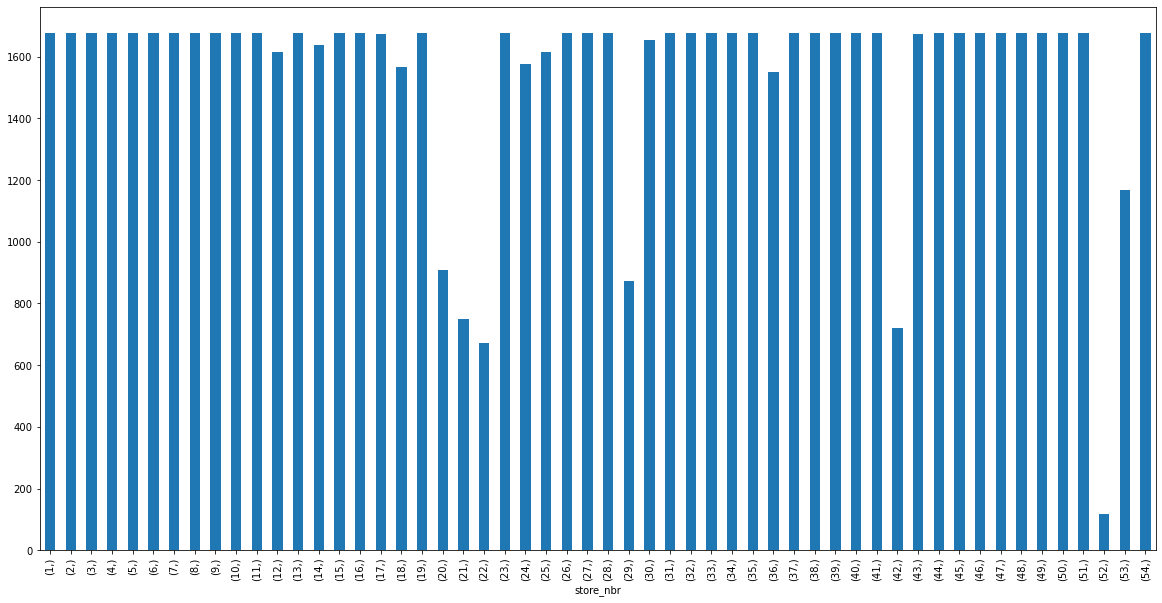

In [16]:
transactions_rawdf[['store_nbr']].value_counts().sort_index().plot(kind = 'bar', figsize = (20,10))

In [80]:
transactions_rawdf[transactions_rawdf['transactions'] == 0]

,date,store_nbr,transactions


In [44]:
# Manipulate transactions dataset ----

# Split date
transactions = transactions_rawdf.copy()
transactions['year'] = transactions['date'].str[:4].astype(int)
transactions['month'] = transactions['date'].str[5:7].astype(int)
transactions['day'] = transactions['date'].str[8:10].astype(int)

In [45]:
# Check output
transactions.tail()

,date,store_nbr,transactions,year,month,day
83483,2017-08-15,50,2804,2017,8,15
83484,2017-08-15,51,1573,2017,8,15
83485,2017-08-15,52,2255,2017,8,15
83486,2017-08-15,53,932,2017,8,15
83487,2017-08-15,54,802,2017,8,15


In [61]:
# Manipulate train dataset ----

# Split date
train = train_rawdf.copy()
train['year'] = train['date'].str[:4].astype(int)
train['month'] = train['date'].str[5:7].astype(int)
train['day'] = train['date'].str[8:10].astype(int)

# Create a sales to promo ratio
train['sales_to_promo_ratio'] = train['sales'] / train['onpromotion']

In [65]:
# Check output
train.tail()

,id,date,store_nbr,family,sales,onpromotion,year,month,day,sales_to_promo_ratio
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,2017,8,15,inf
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8,15,154.55300
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,8,15,16.34952
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,15,15.12500
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0,2017,8,15,inf


<AxesSubplot:xlabel='month', ylabel='transactions'>

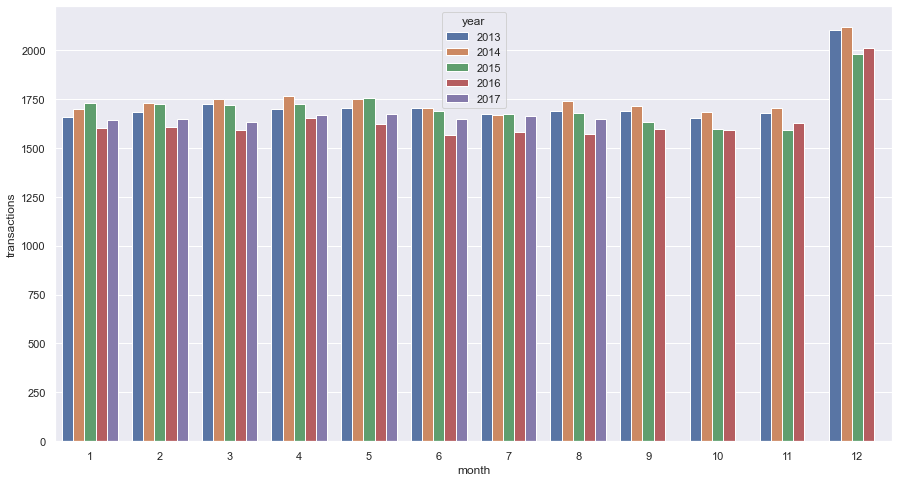

In [54]:
# Plot transactions dataset
sns.set(rc={'figure.figsize':(15, 8)})
sns.barplot(data = transactions, x = 'month', y = 'transactions', hue = 'year', ci = None)

In [ ]:
# Plot by days around the 2016 earthquake

Clear increase in sales over Christmas period.

<AxesSubplot:xlabel='type'>

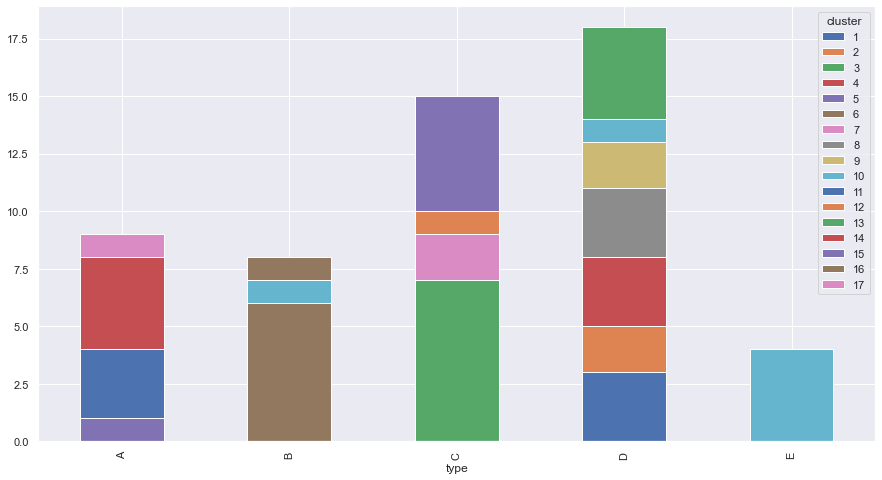

In [62]:
# Visualise relationship between store type and cluster.
pd.crosstab(stores_rawdf['type'], stores_rawdf['cluster']).plot(kind = 'bar', stacked = True)

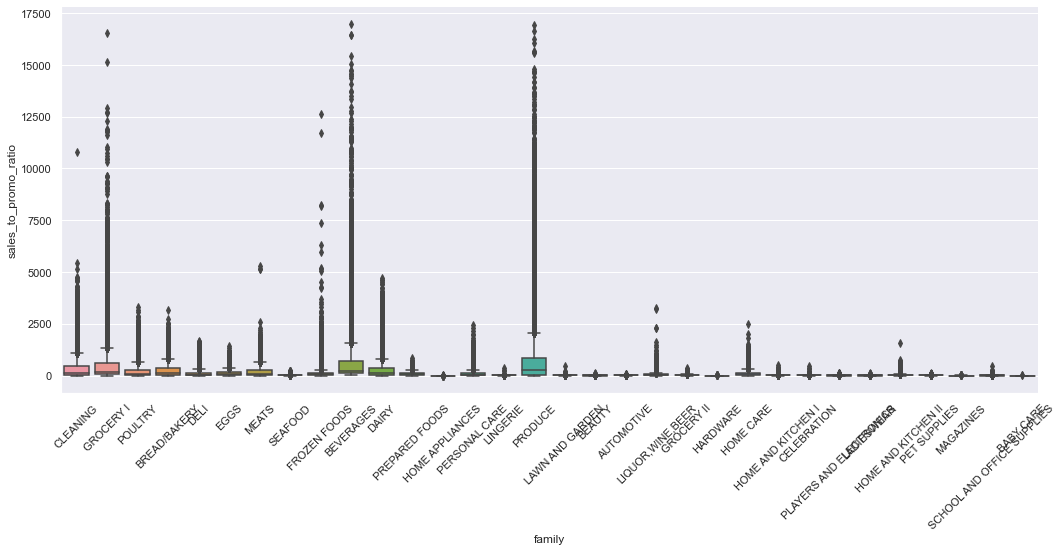

In [76]:
onpromo_chart = sns.catplot(data = train[train['onpromotion'] != 0], x = 'family', y = 'sales_to_promo_ratio', 
            kind = 'box', height = 6, aspect = 2.5)

onpromo_chart.set_xticklabels(rotation=45)

In [88]:
# Recon check: count of sales in train dataset versus count in transactions dataset

train_summary = pd.DataFrame(train.groupby(['date', 'store_nbr'])['sales'].sum())

# Merge train_summary with transactions dataset
merged_trainsum_trans = train_summary.merge(transactions_rawdf, on = ['date', 'store_nbr'], how = 'left')

merged_trainsum_trans

,date,store_nbr,sales,transactions
0,2013-01-01,1,0.000000,NaN
1,2013-01-01,2,0.000000,NaN
2,2013-01-01,3,0.000000,NaN
3,2013-01-01,4,0.000000,NaN
4,2013-01-01,5,0.000000,NaN
...,...,...,...,...
90931,2017-08-15,50,16879.121004,2804.0
90932,2017-08-15,51,20154.559000,1573.0
90933,2017-08-15,52,18600.046000,2255.0
90934,2017-08-15,53,8208.189000,932.0


Conclusion: # of sales will not match # of transactions (there can be multiple sales per transaction).

# Merging datasets:

Mergine stores and holiday_events datatsets - rule to get the 'locale name':
locale = regional -> merge with 'state' column from stores dataset
local = local -> merge with 'city' column from stores dataset

In [94]:
# Merge onto training dataset
train_merged = train.merge(stores_rawdf, on = 'store_nbr', how = 'left')
train_merged = train_merged.merge(transactions_rawdf, on = ['date', 'store_nbr'], how = 'left')

In [97]:
# Check merged dataset
train_merged.tail()

,id,date,store_nbr,family,sales,onpromotion,year,month,day,sales_to_promo_ratio,city,state,type,cluster,transactions
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,2017,8,15,inf,Quito,Pichincha,B,6,2155.0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8,15,154.55300,Quito,Pichincha,B,6,2155.0
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,8,15,16.34952,Quito,Pichincha,B,6,2155.0
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,15,15.12500,Quito,Pichincha,B,6,2155.0
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0,2017,8,15,inf,Quito,Pichincha,B,6,2155.0


In [96]:
len(train_merged) == len(train_rawdf)

True